In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

%matplotlib inline

## Draw Lane Lines on Original Image and Shade Green

In [2]:
filename = './debug/data_in.dat'

# Loads image_unwrap, Minv, ploty, left_fitx, right_fitx
f = open(filename, 'rb') 
image_unwarped_color, Minv, ploty, left_fitx, right_fitx = pkl.load(f)

image_topview = np.zeros((720,1280,3))
image_topview[ploty.astype(int),left_fitx.astype(int),0] = 255
image_topview[ploty.astype(int),right_fitx.astype(int),0] = 255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Lane Lines in Front View')

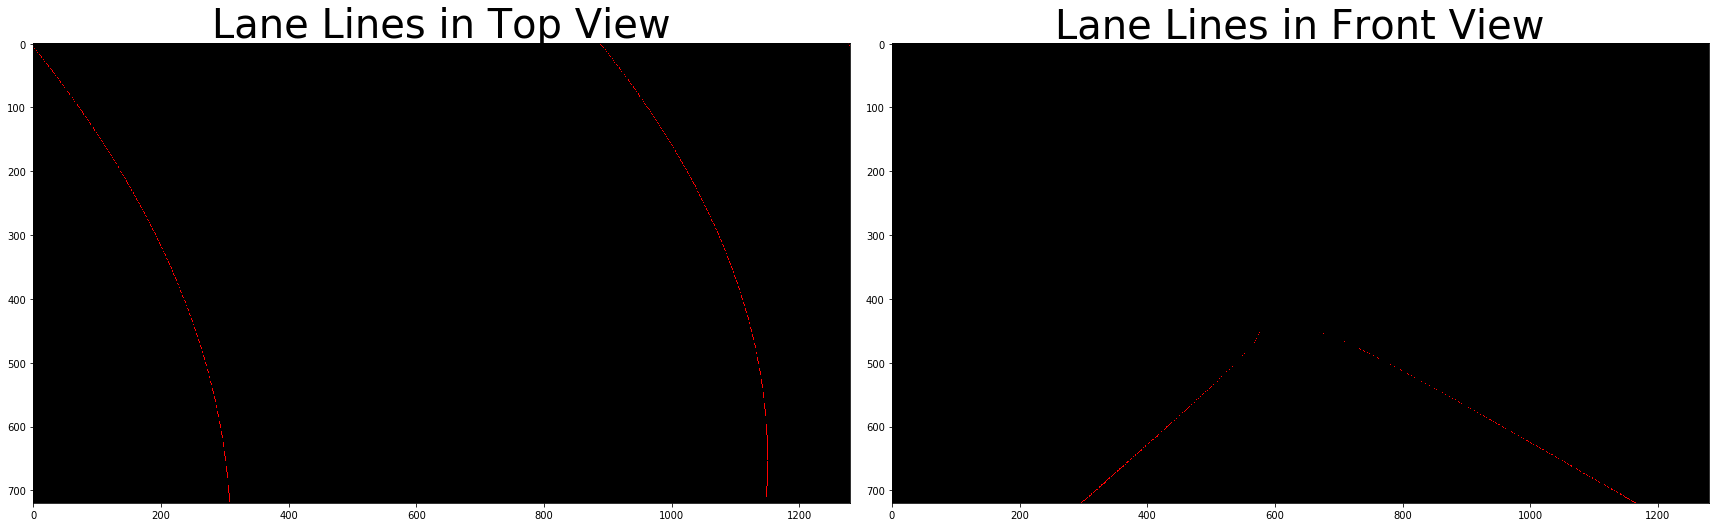

In [3]:
# Show lane lines in top view

# create blank image of depth 3
image_warp = np.zeros([720,1280,3])


# mark points red on blank corresponding to lane lines
for k in range(len(ploty)-1):
    y  = np.min( [ 719, np.int(ploty[k]) ] )        
    xL = np.min( [ 1279, np.int(left_fitx[k]) ] )
    xR = np.min( [ 1279, np.int(right_fitx[k]) ] )                
    image_warp[y,xL,0] = 255
    image_warp[y,xR,0] = 255

# unwarp image    
image_unwarp_back = cv2.warpPerspective(image_warp, Minv, (1280,720))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

# plot showing contiuous lane lines detected in top-down view corresponding to left and right lane lines
ax1.imshow(image_topview)
ax1.set_title('Lane Lines in Top View', fontsize=40)

ax2.imshow(image_unwarp_back)
ax2.set_title('Lane Lines in Front View', fontsize=40)


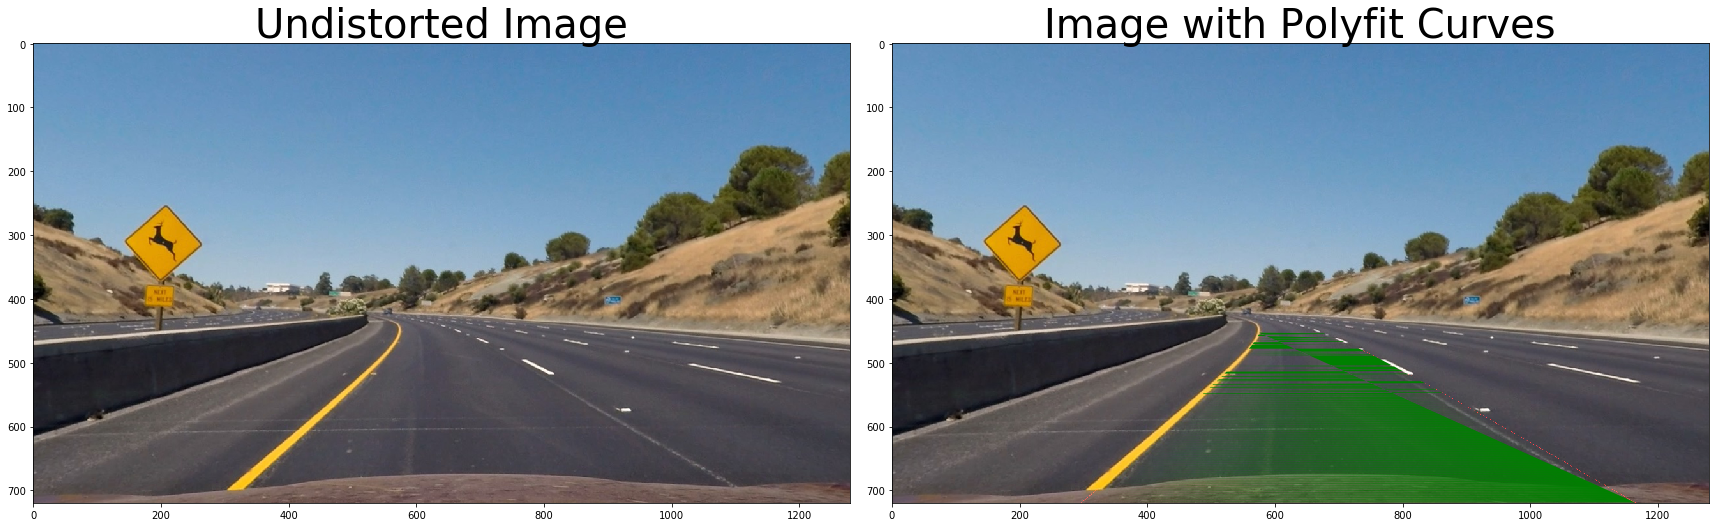

In [13]:
# Show lane lines in front view

# original image, front view (before lane detection)
image1 = np.copy(np.array(image_unwarped_color, dtype=np.uint8))

# blank image with lane markings
image2 = np.copy(np.array(image_unwarp_back, dtype=np.uint8))

dx = 10 # left and right width around lane line
rcd = image2.shape # roq, col, depth
dx_max = rcd[1]


# find all red points projected back to original image
min_red = 0
ind = np.where(image2[:,:,0] > min_red)
indx_poly = ind[1]
indy_poly = ind[0]

# find indices for green patch to be painted
'''
indx_poly = []
indy_poly = []
for k in range(len(ind[0])):
    indy = ind[0][k]
    indx = ind[1][k]
    indL = np.max([0,indx-dx])
    indR = np.min([indx+dx, dx_max-1])
    #image2[indy,indL:indR,0] = 255

    indy_poly = np.append(indy_poly, indy)
    indx_poly = np.append(indx_poly, indx)
'''
    
# Draw images

image_unwarped_back_with_laneline = \
cv2.addWeighted(image1, 1.0, image2, 1.0, 0) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_unwarped_color)
ax1.set_title('Undistorted Image', fontsize=40)
ax2.imshow(image_unwarped_back_with_laneline)
ax2.set_title('Image with Polyfit Curves', fontsize=40)
plt.fill(indx_poly, indy_poly, 'g')


In [6]:
# check number of points before and after projection
print("Number of points before projection = ", 2*len(ploty)) # left and right lane points
print("Number of points after projection = ", len(ind_image2[0])) # left and right lane points in one array


Number of points before projection =  1440
Number of points after projection =  620
